# Raw Data to Actionable Decisions

## Import Libraries

In [12]:
import pandas as pd
import numpy as np
from scipy.sparse import coo_matrix
import seaborn as sns
import matplotlib.pyplot as plt

## Import Dataset

In [13]:
df = pd.read_csv("Default Dataset (1).csv")
df

,x,y
0,10.662224,66.916501
1,11.185640,68.831535
2,11.108675,64.001879
3,11.202875,62.492179
4,11.316173,70.564287
...,...,...
264,62.858430,84.287356
265,63.711752,82.256996
266,63.285561,83.416485
267,64.882836,78.779783


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 269 entries, 0 to 268
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       269 non-null    float64
 1   y       269 non-null    float64
dtypes: float64(2)
memory usage: 4.3 KB


In [15]:
# Remove any rows where coordinates are out of the expected range (0-100)
df = df[(df['x'] >= 0) & (df['x'] <= 100) & (df['y'] >= 0) & (df['y'] <= 100)]

In [16]:
df

,x,y
0,10.662224,66.916501
1,11.185640,68.831535
2,11.108675,64.001879
3,11.202875,62.492179
4,11.316173,70.564287
...,...,...
264,62.858430,84.287356
265,63.711752,82.256996
266,63.285561,83.416485
267,64.882836,78.779783


In [17]:
# Now we will create a 1000x1000 matrix
matrix_size=1000
# Create the row and column indices for the sparse matrix
rows = df['x'].values
cols = df['y'].values

# Create the data array with 1s, representing the presence of a point
data = np.ones_like(rows)

# Construct the sparse matrix
sparse_matrix = coo_matrix((data, (rows, cols)), shape=(matrix_size, matrix_size))

print(sparse_matrix)

  (10, 66)	1.0
  (11, 68)	1.0
  (11, 64)	1.0
  (11, 62)	1.0
  (11, 70)	1.0
  (11, 72)	1.0
  (12, 61)	1.0
  (12, 73)	1.0
  (13, 75)	1.0
  (13, 58)	1.0
  (13, 57)	1.0
  (14, 76)	1.0
  (14, 29)	1.0
  (14, 26)	1.0
  (14, 31)	1.0
  (14, 25)	1.0
  (14, 55)	1.0
  (14, 24)	1.0
  (15, 77)	1.0
  (15, 23)	1.0
  (15, 32)	1.0
  (15, 21)	1.0
  (15, 51)	1.0
  (15, 34)	1.0
  (16, 78)	1.0
  :	:
  (84, 74)	1.0
  (85, 74)	1.0
  (86, 76)	1.0
  (86, 74)	1.0
  (88, 74)	1.0
  (88, 78)	1.0
  (89, 75)	1.0
  (89, 80)	1.0
  (90, 76)	1.0
  (90, 81)	1.0
  (91, 81)	1.0
  (91, 77)	1.0
  (92, 81)	1.0
  (92, 79)	1.0
  (93, 81)	1.0
  (60, 89)	1.0
  (61, 87)	1.0
  (60, 87)	1.0
  (57, 89)	1.0
  (55, 89)	1.0
  (62, 84)	1.0
  (63, 82)	1.0
  (63, 83)	1.0
  (64, 78)	1.0
  (15, 53)	1.0


## Matrix Rotation by 90 degree

In [33]:
dense_matrix = sparse_matrix.toarray()
rotated_matrix = np.transpose(dense_matrix)[:]


In [34]:
print(rotated_matrix)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


## Flip the matrix Horizontally

In [35]:
flipped_matrix = dense_matrix[:, :]
print(flipped_matrix)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


## Convert the rotated and flipped matrix into x-ycoordinated

In [36]:
# Function to convert matrix to coordinates
def coordinates(matrix):
    rows, cols = np.nonzero(matrix)
    return list(zip(rows, cols))

# Get coordinates from the rotated matrix
rotated_coordinates = coordinates(rotated_matrix)
print("Rotated Coordinates: ")
print(rotated_coordinates)

# Get coordinates from the flipped matrix
flipped_coordinates = coordinates(flipped_matrix)
print("\nFlipped Coordinates: ")
print(flipped_coordinates)

Rotated Coordinates: 
[(13, 24), (13, 25), (13, 26), (13, 27), (13, 28), (14, 20), (14, 21), (14, 22), (14, 23), (14, 29), (14, 30), (14, 31), (15, 19), (15, 32), (15, 33), (15, 47), (15, 48), (15, 49), (15, 50), (16, 18), (16, 34), (16, 35), (16, 51), (17, 17), (17, 36), (17, 37), (17, 46), (17, 52), (18, 17), (18, 38), (18, 53), (19, 39), (19, 45), (19, 54), (20, 16), (20, 40), (20, 55), (21, 15), (21, 41), (21, 45), (22, 42), (22, 56), (23, 15), (23, 43), (23, 46), (23, 56), (24, 14), (24, 44), (24, 57), (25, 14), (25, 45), (25, 46), (26, 14), (26, 58), (27, 47), (27, 58), (28, 48), (29, 14), (29, 49), (29, 59), (30, 50), (30, 60), (31, 14), (31, 51), (32, 15), (32, 60), (33, 52), (33, 61), (34, 15), (34, 53), (35, 16), (35, 19), (35, 20), (35, 21), (35, 54), (35, 61), (36, 17), (36, 18), (36, 55), (37, 17), (37, 22), (37, 61), (38, 16), (38, 19), (38, 20), (38, 21), (38, 56), (38, 61), (39, 57), (40, 16), (40, 57), (40, 58), (40, 61), (41, 58), (41, 61), (42, 16), (42, 59), (42, 60

# Visualization

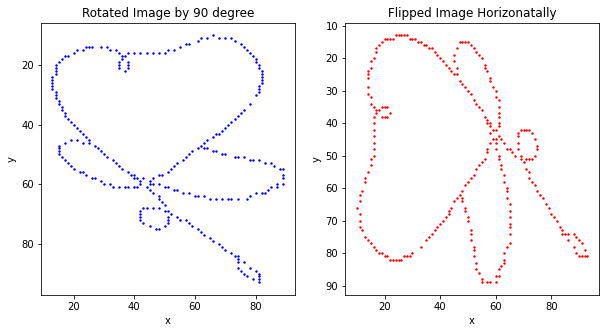

In [37]:
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.scatter(*zip(*rotated_coordinates),c='blue', s=2)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Rotated Image by 90 degree')
plt.gca().invert_yaxis() 


plt.subplot(1,2,2)
plt.scatter(*zip(*flipped_coordinates), c='red', s=2)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Flipped Image Horizonatally')
plt.gca().invert_yaxis() 

plt.show()